# Analyzing Otu sequences from 16S.

### Retrieve the otu sequences.

Otus.fasta file was obtained from preprocessing pipeline which merged the paired-end reads, trimmed off primers and filtered the reads, obtained oriented reads from silva reference db, retrieved unique reads, detected for chimeras and clustered the reads to obtain otus in fasta format.

In [1]:
input_file = "otus.fasta"

In [2]:
# importing packages
import Bio
from Bio import SeqIO

### Read/parse them 

In [3]:
for otu in SeqIO.parse(input_file, "fasta"):
    print(otu.id)
    print(otu.seq)
    print(len(otu.seq))


Otu1
TACGTAGGGGGCTAGCGTTATCCGGATTTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGTCAGGAGTTAAAGGCTACGGCTCAACCGTAGTAAGCTCCTGATACTGTCTGACTTGAGTGCAGGAGAGGAAAGCGGAATTCCCAGTGTAGCGGTGAAATGCGTAGATATTGGGAGGAACACCAGTAGCGAAGGCGGCTTTCTGGACTGTAACTGACGCTGAGGCACGAAAGCGTGGGGAGCAAACAGG
252
Otu2
TACGGAAGGTCCAGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGGCGGACTCTTAAGTCAGTTGTGAAATACGGCGGCTCAACCGTCGGACTGCAGTTGATACTGGGAGTCTTGAGTGCACACAGGGATGCTGGAATTCATGGTGTAGCGGTGAAATGCTCAGATATCATGAAGAACTCCGATCGCGAAGGCAGGTATCCGGGGTGCAACTGACGCTGAGGCTCGAAAGTGCGGGTATCAAACAGG
253
Otu3
TACGTATGTCGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGCGGTTTGGTAAGTCTGATGTGAAAATGCGGGGCTCAACTCCGTATTGCGTTGGAAACTGCCAAACTAGAGTACTGGAGAGGTAGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGCCGATGGGGAAGCCAGCCTACTGGACAGATACTGACGCTAAAGCGCGAAAGCGTGGGTAGCAAACAGG
252
Otu4
TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGGGAACGCAGGCGGTCTTTTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGTAGTGCATTGGAAACTGGGAGACTTGAGTGCAGAAGAGGAGAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAAGCGGCTCTCTG

In [4]:
otus = [otu.seq for otu in SeqIO.parse(input_file, "fasta")]
otus

[Seq('TACGTAGGGGGCTAGCGTTATCCGGATTTACTGGGCGTAAAGGGTGCGTAGGCG...AGG'),
 Seq('TACGGAAGGTCCAGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGGCG...AGG'),
 Seq('TACGTATGTCGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGCG...AGG'),
 Seq('TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGGGAACGCAGGCG...AGG'),
 Seq('TACGTAGGTGGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCATGTAGGCG...GGG'),
 Seq('TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCC...AGG'),
 Seq('TACGTATGTCGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTG...AGG'),
 Seq('TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCG...AGG'),
 Seq('TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACG...AGG'),
 Seq('AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCG...AGG'),
 Seq('TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCG...AGG'),
 Seq('TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACG...AGG'),
 Seq('TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCG...AGG'),
 Seq('TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGGGAGCGCAGGCG...GGG'),
 Seq('TACGTAGGGGGCGA

In [5]:
#last otu sequence
otus[-1]

Seq('TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACG...AGG')

In [6]:
otu.seq

Seq('TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACG...AGG')

In [7]:
len(otu.seq)

253

In [8]:
otu.seq[243:]

Seq('AGCAAACAGG')

In [9]:
otu.id

'Otu215'

#### Analyzing the Otus in terms of length. 

In [10]:
length_otus = [len(otu) for otu in SeqIO.parse(input_file, "fasta")]
len(length_otus), min(length_otus), max(length_otus)

(215, 250, 254)

The input_file has 215 otus sequences the maximum length of the otus being 254bp while minimum length being 250bp.

#### Plotting a histogram of the Otus sequence length in basepairs.

In [11]:
#importing packages
import matplotlib.pylab as plt

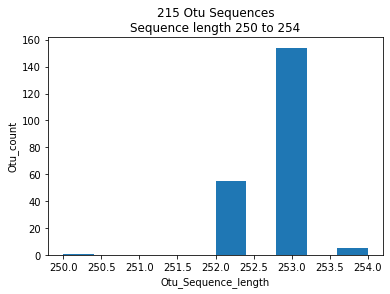

<Figure size 432x288 with 0 Axes>

In [12]:
#plotting histogram
plt.hist(length_otus)
plt.title("%i Otu Sequences\nSequence length %i to %i" % (len(length_otus), min(length_otus), max(length_otus)))
plt.xlabel("Otu_Sequence_length")
plt.ylabel("Otu_count")
plt.show()
plt.savefig("Otus_seq_length")

#### Analyzing the GC_content of the otus

In [13]:
#importing packages
from Bio.SeqUtils import GC

In [14]:
GC_values = sorted(GC(otu.seq) for otu in SeqIO.parse(input_file, "fasta"))
GC_values

[46.24505928853755,
 47.03557312252964,
 47.430830039525695,
 47.430830039525695,
 47.430830039525695,
 47.430830039525695,
 47.61904761904762,
 47.63779527559055,
 47.82608695652174,
 48.22134387351779,
 48.22134387351779,
 48.41269841269841,
 48.616600790513836,
 48.616600790513836,
 48.616600790513836,
 48.616600790513836,
 48.80952380952381,
 49.01185770750988,
 49.01185770750988,
 49.20634920634921,
 49.40711462450593,
 49.40711462450593,
 49.6031746031746,
 49.6031746031746,
 49.6031746031746,
 49.6031746031746,
 49.80237154150198,
 49.80237154150198,
 49.80237154150198,
 49.80237154150198,
 49.80237154150198,
 50.0,
 50.0,
 50.19762845849802,
 50.19762845849802,
 50.3968253968254,
 50.3968253968254,
 50.3968253968254,
 50.3968253968254,
 50.3968253968254,
 50.59288537549407,
 50.59288537549407,
 50.59288537549407,
 50.59288537549407,
 50.59288537549407,
 50.59288537549407,
 50.79365079365079,
 50.98814229249012,
 50.98814229249012,
 50.98814229249012,
 50.98814229249012,
 51.190

In [15]:
len(GC_values), min(GC_values), max(GC_values)

(215, 46.24505928853755, 69.56521739130434)

#### Plotting the GC content across in all the otu sequences.

In [16]:
#importing plot from matplotlib
import matplotlib.pylab as plt

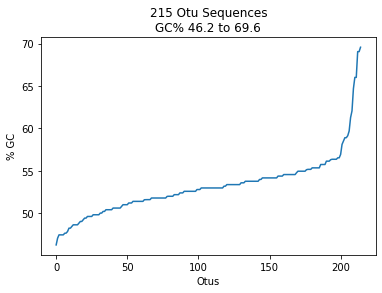

<Figure size 432x288 with 0 Axes>

In [17]:
#plotting the GC_content
plt.plot(GC_values)
plt.title("%i Otu Sequences\nGC%% %0.1f to %0.1f" % (len(GC_values), min(GC_values), max(GC_values)))
plt.xlabel("Otus")
plt.ylabel("% GC")
plt.show()
plt.savefig("Percent_GC")

### Converting the DNA sequences to RNA to Protein.

Transcription DNA converted to mRNA.

In [18]:
# import Seq package
from Bio.Seq import Seq

In [19]:
otu_mrna= [otu.seq.transcribe() for otu in SeqIO.parse(input_file, "fasta")]
otu_mrna

[Seq('UACGUAGGGGGCUAGCGUUAUCCGGAUUUACUGGGCGUAAAGGGUGCGUAGGCG...AGG'),
 Seq('UACGGAAGGUCCAGGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGCAGGCG...AGG'),
 Seq('UACGUAUGUCGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGCGCGUCUAGGCG...AGG'),
 Seq('UACGUAGGUGGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGGGAACGCAGGCG...AGG'),
 Seq('UACGUAGGUGGCGAGCGUUGUCCGGAAUUAUUGGGCGUAAAGAGCAUGUAGGCG...GGG'),
 Seq('UACGGAAGGUCCGGGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGUAGGCC...AGG'),
 Seq('UACGUAUGUCGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGCGCGUCUAGGUG...AGG'),
 Seq('UACGGAGGAUCCGAGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGUAGGCG...AGG'),
 Seq('UACGUAGGGGGCAAGCGUUAUCCGGAUUUACUGGGUGUAAAGGGAGCGUAGACG...AGG'),
 Seq('AACGUAGGUCACAAGCGUUGUCCGGAAUUACUGGGUGUAAAGGGAGCGCAGGCG...AGG'),
 Seq('UACGGAGGGUGCAAGCGUUAAUCGGAAUUACUGGGCGUAAAGCGCACGCAGGCG...AGG'),
 Seq('UACGGAGGAUGCGAGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGCAGACG...AGG'),
 Seq('UACGUAGGGUGCAAGCGUUAAUCGGAAUUACUGGGCGUAAAGCGUGCGCAGGCG...AGG'),
 Seq('UACGUAGGUGGCAAGCGUUGUCCGGAAUUAUUGGGCGUAAAGGGAGCGCAGGCG...GGG'),
 Seq('UACGUAGGGGGCGA

In [20]:
otu_mrna= [otu.id for otu in SeqIO.parse(input_file, "fasta")]
otu_mrna

['Otu1',
 'Otu2',
 'Otu3',
 'Otu4',
 'Otu5',
 'Otu6',
 'Otu7',
 'Otu8',
 'Otu9',
 'Otu10',
 'Otu11',
 'Otu12',
 'Otu13',
 'Otu14',
 'Otu15',
 'Otu16',
 'Otu17',
 'Otu18',
 'Otu19',
 'Otu20',
 'Otu21',
 'Otu22',
 'Otu23',
 'Otu24',
 'Otu25',
 'Otu26',
 'Otu27',
 'Otu28',
 'Otu29',
 'Otu30',
 'Otu31',
 'Otu32',
 'Otu33',
 'Otu34',
 'Otu35',
 'Otu36',
 'Otu37',
 'Otu38',
 'Otu39',
 'Otu40',
 'Otu41',
 'Otu42',
 'Otu43',
 'Otu44',
 'Otu45',
 'Otu46',
 'Otu47',
 'Otu48',
 'Otu49',
 'Otu50',
 'Otu51',
 'Otu52',
 'Otu53',
 'Otu54',
 'Otu55',
 'Otu56',
 'Otu57',
 'Otu58',
 'Otu59',
 'Otu60',
 'Otu61',
 'Otu62',
 'Otu63',
 'Otu64',
 'Otu65',
 'Otu66',
 'Otu67',
 'Otu68',
 'Otu69',
 'Otu70',
 'Otu71',
 'Otu72',
 'Otu73',
 'Otu74',
 'Otu75',
 'Otu76',
 'Otu77',
 'Otu78',
 'Otu79',
 'Otu80',
 'Otu81',
 'Otu82',
 'Otu83',
 'Otu84',
 'Otu85',
 'Otu86',
 'Otu87',
 'Otu88',
 'Otu89',
 'Otu90',
 'Otu91',
 'Otu92',
 'Otu93',
 'Otu94',
 'Otu95',
 'Otu96',
 'Otu97',
 'Otu98',
 'Otu99',
 'Otu100',
 'Otu101

In [21]:
for otu in SeqIO.parse(input_file, "fasta"):
    print(otu.id)
    print(otu.seq.transcribe())

Otu1
UACGUAGGGGGCUAGCGUUAUCCGGAUUUACUGGGCGUAAAGGGUGCGUAGGCGGUCUUUCAAGUCAGGAGUUAAAGGCUACGGCUCAACCGUAGUAAGCUCCUGAUACUGUCUGACUUGAGUGCAGGAGAGGAAAGCGGAAUUCCCAGUGUAGCGGUGAAAUGCGUAGAUAUUGGGAGGAACACCAGUAGCGAAGGCGGCUUUCUGGACUGUAACUGACGCUGAGGCACGAAAGCGUGGGGAGCAAACAGG
Otu2
UACGGAAGGUCCAGGCGUUAUCCGGAUUUAUUGGGUUUAAAGGGAGCGCAGGCGGACUCUUAAGUCAGUUGUGAAAUACGGCGGCUCAACCGUCGGACUGCAGUUGAUACUGGGAGUCUUGAGUGCACACAGGGAUGCUGGAAUUCAUGGUGUAGCGGUGAAAUGCUCAGAUAUCAUGAAGAACUCCGAUCGCGAAGGCAGGUAUCCGGGGUGCAACUGACGCUGAGGCUCGAAAGUGCGGGUAUCAAACAGG
Otu3
UACGUAUGUCGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGCGCGUCUAGGCGGUUUGGUAAGUCUGAUGUGAAAAUGCGGGGCUCAACUCCGUAUUGCGUUGGAAACUGCCAAACUAGAGUACUGGAGAGGUAGGCGGAACUACAAGUGUAGAGGUGAAAUUCGUAGAUAUUUGUAGGAAUGCCGAUGGGGAAGCCAGCCUACUGGACAGAUACUGACGCUAAAGCGCGAAAGCGUGGGUAGCAAACAGG
Otu4
UACGUAGGUGGCAAGCGUUAUCCGGAUUUAUUGGGCGUAAAGGGAACGCAGGCGGUCUUUUAAGUCUGAUGUGAAAGCCUUCGGCUUAACCGGAGUAGUGCAUUGGAAACUGGGAGACUUGAGUGCAGAAGAGGAGAGUGGAACUCCAUGUGUAGCGGUGAAAUGCGUAGAUAUAUGGAAGAACACCAGUGGCGAAAGCGGCUCUCUGGUCUGUAACUGA

In [22]:
# OtmRNA = (
#     otu.id
#     #otu.seq.trasncribe()
#     for otu in SeqIO.parse(input_file, "fasta"): 
#          )
#mRNAfile = SeqIO.write(OtmRNA, "mRNAotus.fasta", "fasta")
#mRNAfile
# OtmRNa= (for otu in SeqIO.parse(input_file, "fasta"):
#     print(otu.id)
#     print(otu.seq.transcribe())
#         )

OtmRNA = [({'id': otu.id, 'description':otu.seq.transcribe()}) for otu in SeqIO.parse(input_file, "fasta")]
print(OtmRNA[0])

mRNAfile = map(lambda x: SeqIO.write(OtmRNA, "hutta.fasta", "fasta"), OtmRNA)

{'id': 'Otu1', 'description': Seq('UACGUAGGGGGCUAGCGUUAUCCGGAUUUACUGGGCGUAAAGGGUGCGUAGGCG...AGG')}


In [23]:
mRNA = ( 
        for otu in SeqIO.parse(input_file, "fasta"):
            print(otu.id)
            print(otu.seq.transcribe())
)
mRnasFa = SeqIO.write(mRNA, "otumrna.fasta", "fasta")
mRnasFa

SyntaxError: invalid syntax (<ipython-input-23-d09f5589e4eb>, line 2)

In [24]:
SeqIO.write(for otu in SeqIO.parse(input_file, "fasta"):
    print(otu.id)
    print(otu.seq.transcribe())
           , "MRNAotus.fasta", "fasta")

SyntaxError: invalid syntax (<ipython-input-24-d6e163ec7475>, line 1)

### Translation
The messenger RNA is converted to protein sequence with the aid of RNA polymerase. Seq translate() function is used on the mRNA. 

However, you can obtain a protein sequence directly from the coding DNA sequence using the same function. 

In [25]:
for otu in SeqIO.parse(input_file, "fasta"):
    print(otu.id)
    print(otu.seq.translate(table =11))

Otu1
YVGG*RYPDLLGVKGA*AVFQVRS*RLRLNRSKLLILSDLSAGEESGIPSVAVKCVDIGRNTSSEGGFLDCN*R*GTKAWGANR
Otu2
YGRSRRYPDLLGLKGAQADS*VSCEIRRLNRRTAVDTGSLECTQGCWNSWCSGEMLRYHEELRSRRQVSGVQLTLRLESAGIKQ
Otu3
YVCRKRYPDLLGVKRV*AVW*V*CENAGLNSVLRWKLPN*STGEVGGTTSVEVKFVDICRNADGEASLLDRY*R*SAKAWVANR
Otu4
YVGGKRYPDLLGVKGTQAVF*V*CESLRLNRSSALETGRLECRRGEWNSMCSGEMRRYMEEHQWRKRLSGL*LTLRFESVGSKQ
Otu5
YVGGERCPELLGVKSM*AVS*VWSENAGLNPVWLWILGDLSAGEERGIPSVAVKCVDIGRNTSGEGAFLDCV*R*DAKARVANG
Otu6
YGRSGRYPDLLGLKGA*AGD*ACCEM*MLNI*TAARTGFLEYAQSGRNSWCSGEMLRYHEELRLRRQLTGAQLTLKLESAGIEQ
Otu7
YVCRKRYPDLLGVKRV*VVW*V*CENAGLNSVLRWKLPN*SIGEVGGTTSVEVKFVDICRNADREVSSLDEY*H*SAKAWGANR
Otu8
YGGSERYPDLLGLKGA*AEF*VSCESLRLNRKIAVDTGVLECGKGRRNSWCSGEMLRYHEELRLRRQLAGP*LTLMLESAGIKQ
Otu9
YVGGKRYPDLLGVKGA*TEEQV*CERLGLNPRTALETVFLECRRGKRNS*CSGEMRRY*EEHQWRRRLTGR*LTLRLESVGSKQ
Otu10
NVGHKRCPELLGVKGAQAGRQVGSEIYGLNP*TAFKTVFLE*CRGRRNSRCSGGMRRYREEHQWRRRPTGHQLTLRLESVGSKQ
Otu11
YGGCKR*SELLGVKRTQAVC*VRCEIPGLNLGTASDTGKLESRRGG*NSRCSGEMRRDLEEYRWRRRPPGRRLTLRCESVGSKQ
Otu12
YG

/home/icipe/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
def translateandkeep(readfile,writefile):
    from Bio import SeqIO
    records = (rec.translate(id="tr_"+rec.id, description="Transcribed sequences") \
               for rec in SeqIO.parse(readfile, "fasta") if len(rec) > 0)
    SeqIO.write(records, writefile, "fasta")

In [ ]:
translateandkeep("otus.fasta", "mrRna.fasta")

In [ ]:
Otus = (otu.transcribe(id="mr_"+otu.id, description="Transcribed sequences")\
        for otu in SeqIO.parse(input_file, "fasta"))
SeqIO.write(Otus, "mrna.fasta", "fasta")

In [ ]:
otu_protein = otu_mrna.seq.translate()
otu_protein

In [ ]:
mRNAs = SeqIO.write(otu_mrna, "Otu_mRNA.fasta", "fasta")

### Blast to compare with other genomes from NCBI

In [ ]:
from Bio.Blast import NCBIWWW

In [ ]:
query_result = NCBIWWW.qblast("blastn", "nt", otu.seq)

In [ ]:
from Bio import SearchIO
otublast = SearchIO.read(query_result, "blast-xml") 

In [ ]:
print(otublast)

In [ ]:
first_hit = otublast[0]
print(first_hit)

In [ ]:
first_hit.id

In [ ]:
first_hsp = otublast[0][0]
print(first_hsp)

In [ ]:
first_hsp.gap_num

### Analysis of the blast hit results.

In [ ]:
NCBI_Id = first_hit.id.split('|')[3]
NCBI_Id

In [ ]:
from Bio import Entrez

In [ ]:
Entrez.email = "gatheruwambui3@gmail.com"

In [ ]:
handle = Entrez.efetch(db= "nucleotide", id =NCBI_Id, retmode = "text", rettype = "gb", )

In [ ]:
genbank_seq = SeqIO.read(handle, "genbank")

In [ ]:
genbank_seq

In [ ]:
genbbank_seq.annotations

In [ ]:
genbank_seq.annotations["molecule_type"]

In [ ]:
for reference in genbank_seq.annotations["references"]:
    print(reference)

In [ ]:
genbnk_last_seq.features

In [ ]:
len(genbank_seq.features)

In [ ]:
{feature.type for feature in genbank_seq.features}

In [ ]:
rRNA = [feature for feature in genbank_seq.features if feature.type == "rRNA"]
len(rRNA)

In [ ]:
rRNA

In [ ]:
print(rRNA)

In [ ]:
{qualifier for qualifier in rRNA[0].qualifiers}

In [ ]:
rRNA[0].qualifiers["product"]

In [ ]:
Srce = [feature for feature in genbank_seq.features if feature.type == "source"]
len(Srce)

In [ ]:
print(Srce)

In [ ]:
{qualifier for qualifier in Srce[0].qualifiers}

In [ ]:
for qualifier in Srce[0].qualifiers


In [ ]:
Srce[0].qualifiers["clone"]

In [ ]:
Srce[0].qualifiers["mol_type"]

In [ ]:
Srce[0].qualifiers["organism"]

### Comparing the last blast hit

In [ ]:
last_hit = otublast[-1]
print(last_hit)

In [ ]:
last_hit.id

In [ ]:
NCBI_last_id = last_hit.id.split('|')[3]
NCBI_last_id

In [ ]:
last_hit_hsp = last_hit[0]
print(last_hit_hsp)

In [ ]:
last_hit_hsp = otublast[-1][0]
print(last_hit_hsp)

In [ ]:
last_hit_hsp.gap_num

In [ ]:
from Bio import Entrez
Entrez.email = "gatheruwambui3@gmail.com"

In [ ]:
last_queryr = Entrez.efetch(db = "nucleotide", id = NCBI_last_id, retmode= "text", rettype = "gb")

In [ ]:
genbnk_last_seq = SeqIO.read(last_queryr, "genbank")
genbnk_last_seq

In [ ]:
genbnk_last_seq.description

In [ ]:
genbnk_last_seq.annotations["taxonomy"]


In [ ]:
genbnk_last_seq.annotations

In [ ]:
genbnk_last_seq.annotations["references"]

In [ ]:
for reference in genbnk_last_seq.annotations["references"]:
    print(reference)


In [ ]:
len(genbnk_last_seq.seq)

In [ ]:
genbnk_last_seq.seq

In [ ]:
genbnk_last_seq.id

In [ ]:
genbnk_last_seq.name

In [ ]:
genbnk_last_seq.features

In [ ]:
len(genbnk_last_seq.features)

In [ ]:
Sorc = [feature for feature in genbnk_last_seq.features if feature.type == "source"]
len(Sorc)

In [ ]:
Sorc[0]

In [ ]:
Sorc[0].qualifiers

In [ ]:
Sorc[0].qualifiers["organism"]

In [ ]:
Sorc[0].qualifiers["mol_type"]

In [ ]:
Gene = [feature for feature in genbnk_last_seq.features if feature.type == "gene"]
len(Gene)

In [ ]:
Gene[0]

In [ ]:
Gene[0].qualifiers

In [ ]:
Gene[0].qualifiers["gene"]

In [ ]:
Ribosomal_RNA = [feature for feature in genbnk_last_seq.features if feature.type == "rRNA"]
len(Ribosomal_RNA)

In [ ]:
Ribosomal_RNA[0]

In [ ]:
Ribosomal_RNA[0].qualifiers

In [ ]:
Ribosomal_RNA[0].qualifiers["gene"]

In [ ]:
Ribosomal_RNA[0].qualifiers["product"]

In [ ]:
from Bio import Phylo

In [ ]:
tree = Phylo.read("tree.nwk", "newick")

In [ ]:
print(tree)

In [ ]:
import matplotlib.pylab
Phylo.draw(tree)